In [1]:
# Importing our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the dataset from the same folder as the working folder
#EGS means Electrical Grid Stability
EGS_data = pd.read_csv('Data_for_UCI_named.csv')

In [3]:
EGS_data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [4]:
EGS_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
tau1     10000 non-null float64
tau2     10000 non-null float64
tau3     10000 non-null float64
tau4     10000 non-null float64
p1       10000 non-null float64
p2       10000 non-null float64
p3       10000 non-null float64
p4       10000 non-null float64
g1       10000 non-null float64
g2       10000 non-null float64
g3       10000 non-null float64
g4       10000 non-null float64
stab     10000 non-null float64
stabf    10000 non-null object
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [5]:
#Checking for missing value
EGS_data.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [6]:
# Dropping The 'stab' variable
EGS_data.drop('stab', axis = 1, inplace=True)

In [7]:
EGS_data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


In [8]:
# Counting the categorical variables before encoding
EGS_data['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [9]:
# Using for loop to Labelcode the categorical data/column
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in EGS_data.columns:
    if EGS_data[col].dtype == 'object':
        EGS_data[col] = encoder.fit_transform(EGS_data[col])

In [10]:
EGS_data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,1
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,0
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,1
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,1
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,1


In [11]:
# Counting the categorical variables after encoding
EGS_data['stabf'].value_counts()

1    6380
0    3620
Name: stabf, dtype: int64

Comparing the counts of the categorical features before and after encoding, we can see that "1" represents "unstable" and "0" represents "stable". 6380 for "unstable" and "1", 3620 for ""stable"" and "0".

In [12]:
EGS_data['stabf'].shape

(10000,)

### Standard Scaling the Dataset

In [13]:
from sklearn.preprocessing import MinMaxScaler # For normalizing our dataset to common scale# Separating the features and response variable.
scaler = MinMaxScaler()
normalised_EGS_data = pd.DataFrame(scaler.fit_transform(EGS_data), columns = EGS_data.columns)
X = normalised_EGS_data.drop('stabf', axis = 1) # dropping the response variables
y = normalised_EGS_data['stabf']

### Spliting The Dataset into Train/Test Sets

We will split our dataset (Features (X) and Outcome/Label (Y)) into training and test data by using train_test_split() function from sklearn. The training set will be 80% while the test set will be 20%. The random_state that is set to 1 is for all of us to have the same set of data.

In [14]:
#Importing the training and testing spliting libraries
from sklearn.model_selection import train_test_split

In [15]:
#Spliting the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [16]:
X_train.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
2694,0.605895,0.214982,0.686826,0.944949,0.454782,0.516748,0.874552,0.255448,0.545528,0.598331,0.669193,0.642234
5140,0.481097,0.525292,0.797470,0.027435,0.616162,0.479599,0.065178,0.641255,0.414248,0.049680,0.912596,0.083403
2568,0.075724,0.874121,0.355155,0.835193,0.474432,0.640529,0.697645,0.252484,0.903588,0.919622,0.198780,0.642306
3671,0.736693,0.652385,0.873580,0.171152,0.362461,0.278697,0.940452,0.691134,0.221930,0.893734,0.962913,0.579607
7427,0.692014,0.088147,0.589553,0.764155,0.220544,0.718338,0.911640,0.685474,0.983833,0.701163,0.828352,0.121206


In [17]:
X_train.shape

(8000, 12)

In [18]:
y_train.value_counts()

1.0    5092
0.0    2908
Name: stabf, dtype: int64

### Decision Tree Classifier Model

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
dtree = DecisionTreeClassifier(random_state=1)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

### Prediction And Model Evaluation

In [21]:
ydt_pred = dtree.predict(X_test)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, recall_score, accuracy_score, precision_score, f1_score

In [23]:
print('Confusion Matrix: \n{}'.format(confusion_matrix(y_test, ydt_pred)))
print('\n')
print('Classification Report: \n{}'.format(classification_report(y_test, ydt_pred)))

Confusion Matrix: 
[[ 567  145]
 [ 149 1139]]


Classification Report: 
             precision    recall  f1-score   support

        0.0       0.79      0.80      0.79       712
        1.0       0.89      0.88      0.89      1288

avg / total       0.85      0.85      0.85      2000



### Accuracy

In [24]:
accuracy = accuracy_score(y_test, ydt_pred) 
print( 'Accuracy: {}' .format(round(accuracy* 100 ), 2 ))

Accuracy: 85.0


### Precision

In [25]:
precision = precision_score(y_test, ydt_pred) 
print( 'Precision: {}' .format(round(precision* 100 ), 2 ))

Precision: 89.0


### Recall

In [26]:
recall = recall_score(y_test, ydt_pred) 
print( 'Recall: {}' .format(round(recall* 100 ), 2 ))

Recall: 88.0


### F1-Score

In [27]:
f1 = f1_score(y_test, ydt_pred) 
print( 'F1_score: {}' .format(round(f1* 100 ), 2 ))

F1_score: 89.0


## Building Random Forest Model

In [28]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [121]:
rfc =RandomForestClassifier(random_state=1)

In [122]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

### Prediction And Model Evaluation

In [123]:
rfc_pred =rfc.predict(X_test)

In [124]:
print('Confusion Matrix: \n{}'.format(confusion_matrix(y_test, rfc_pred)))
print('\n')
print('Classification Report: \n{}'.format(classification_report(y_test, rfc_pred)))

Confusion Matrix: 
[[ 627   85]
 [ 134 1154]]


Classification Report: 
             precision    recall  f1-score   support

        0.0       0.82      0.88      0.85       712
        1.0       0.93      0.90      0.91      1288

avg / total       0.89      0.89      0.89      2000



### Accuracy RFC

In [125]:
accuracy = accuracy_score(y_test, rfc_pred) 
print( 'Accuracy: {}' .format(round(accuracy* 100 ), 2 ))
accuracy

Accuracy: 89.0


0.8905

### Precision RFC

In [34]:
precision = precision_score(y_test, rfc_pred) 
print( 'Precision: {}' .format(round(precision* 100 ), 2 ))

Precision: 93.0


### Recall RFC

In [35]:
recall = recall_score(y_test, rfc_pred) 
print( 'Recall: {}' .format(round(recall* 100 ), 2 ))

Recall: 95.0


### F1_Score RFC

In [36]:
f1 = f1_score(y_test, rfc_pred) 
print( 'F1_score: {}' .format(round(f1* 100 ), 2 ))

F1_score: 94.0


## Building Extra Trees Classifier

In [80]:
etc = ExtraTreesClassifier(random_state=1)

In [81]:
etc.fit(X_train,y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

### Prediction And Evaluation

In [82]:
etc_pred =etc.predict(X_test)

In [83]:
#Printing the confusion matrix and classification report
print('Confusion Matrix: \n{}'.format(confusion_matrix(y_test, etc_pred)))
print('\n')
print('Classification Report: \n{}'.format(classification_report(y_test, etc_pred)))

Confusion Matrix: 
[[ 613   99]
 [ 118 1170]]


Classification Report: 
             precision    recall  f1-score   support

        0.0       0.84      0.86      0.85       712
        1.0       0.92      0.91      0.92      1288

avg / total       0.89      0.89      0.89      2000



### Accuracy ETC

In [85]:
accuracy = accuracy_score(y_test, etc_pred) 
print( 'Accuracy: {}' .format(round(accuracy* 100 ), 2 ))
accuracy

Accuracy: 89.0


0.8915

### Precision ETC

In [86]:
precision = precision_score(y_test, etc_pred) 
print( 'Precision: {}' .format(round(precision* 100 ), 2 ))

Precision: 92.0


### Recall ETC

In [87]:
recall = recall_score(y_test, etc_pred) 
print( 'Recall: {}' .format(round(recall* 100 ), 2 ))

Recall: 91.0


### F1-Score

In [88]:
f1 = f1_score(y_test, etc_pred) 
print( 'F1_score: {}' .format(round(f1* 100 ), 2 ))

F1_score: 92.0


### Building XGBoost Model

In [89]:
import xgboost as xgb #XGBoost stufff

In [90]:
XGB = xgb.XGBClassifier(random_state =1)

In [91]:
XGB.fit(X_train,y_train)

C:\Users\user\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:07:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=2, num_parallel_tree=1,
       objective='binary:logistic', random_state=1, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       use_label_encoder=True, validate_parameters=1, verbosity=None)

### Prediction & Evaluation

In [92]:
XGB_pred = XGB.predict(X_test)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [93]:
#Printing the confusion matrix and classification report
print('Confusion Matrix: \n{}'.format(confusion_matrix(y_test, XGB_pred)))
print('\n')
print('Classification Report: \n{}'.format(classification_report(y_test, XGB_pred)))

Confusion Matrix: 
[[ 648   64]
 [  45 1243]]


Classification Report: 
             precision    recall  f1-score   support

        0.0       0.94      0.91      0.92       712
        1.0       0.95      0.97      0.96      1288

avg / total       0.95      0.95      0.95      2000



### Accuracy XGB

In [94]:
accuracy = accuracy_score(y_test, XGB_pred) 
print( 'Accuracy: {}' .format(round(accuracy* 100 ), 2 ))
accuracy

Accuracy: 95.0


0.9455

### Pecision XGB

In [95]:
precision = precision_score(y_test, XGB_pred) 
print( 'Precision: {}' .format(round(precision* 100 ), 2 ))

Precision: 95.0


### Recall XGB

In [96]:
recall = recall_score(y_test, XGB_pred) 
print( 'Recall: {}' .format(round(recall* 100 ), 2 ))

Recall: 97.0


### F1-Score XGB

In [97]:
f1 = f1_score(y_test, XGB_pred) 
print( 'F1_score: {}' .format(round(f1* 100 ), 2 ))

F1_score: 96.0


## Building LightGBM Model

In [98]:
import lightgbm as lgb

In [99]:
LGB = lgb.LGBMClassifier(random_state=1)

In [100]:
LGB.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

### Prediction And Evaluation on LGBM Model

In [101]:
LGB_pred = LGB.predict(X_test)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [102]:
#Printing the confusion matrix and classification report
print('Confusion Matrix: \n{}'.format(confusion_matrix(y_test, LGB_pred)))
print('\n')
print('Classification Report: \n{}'.format(classification_report(y_test, LGB_pred)))

Confusion Matrix: 
[[ 641   71]
 [  46 1242]]


Classification Report: 
             precision    recall  f1-score   support

        0.0       0.93      0.90      0.92       712
        1.0       0.95      0.96      0.96      1288

avg / total       0.94      0.94      0.94      2000



### Accuracy LGBM

In [103]:
accuracy = accuracy_score(y_test, LGB_pred) 
print( 'Accuracy: {}' .format(round(accuracy* 100 ), 2 ))
accuracy

Accuracy: 94.0


0.9415

### Precision LGBM

In [104]:
precision = precision_score(y_test, LGB_pred) 
print( 'Precision: {}' .format(round(precision* 100 ), 2 ))

Precision: 95.0


### Recall LGBM

In [105]:
recall = recall_score(y_test, LGB_pred) 
print( 'Recall: {}' .format(round(recall* 100 ), 2 ))

Recall: 96.0


### F1-Score LGBM

In [106]:
f1 = f1_score(y_test, LGB_pred) 
print( 'F1_score: {}' .format(round(f1* 100 ), 2 ))

F1_score: 96.0


## Cross-validation Using StratifiedKFold

StratifiedKFold is chosen as the Cross Validation method to ensure that there's an equal proportion of each target class to obtain a good representation of data and to avoid imbalance and biased model

In [107]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits= 5, shuffle= True, random_state= 1)

## Building Randomized SearchCV Model on the ExtraTreeClassifier

In [108]:
from sklearn.model_selection import RandomizedSearchCV

In [109]:
# Initiating parameters for hyperparameter_grid
n_estimators = [50, 100, 300, 500, 1000]

min_samples_split = [2, 3, 5, 7, 9]

min_samples_leaf = [1, 2, 4, 6, 8]

max_features = ['auto', 'sqrt', 'log2', None]

In [110]:
hyperparameter_grid = {'n_estimators': n_estimators,

'min_samples_leaf': min_samples_leaf,

'min_samples_split': min_samples_split,

'max_features': max_features}

In [112]:
# Note the cv is the SKFold we called earlier. cv stands for cross validation
rcv = RandomizedSearchCV(etc, hyperparameter_grid, n_iter=10, cv=5, scoring = 'accuracy', n_jobs = -1, verbose = 1, random_state = 1)

In [113]:
RCV = rcv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.2min finished


In [114]:
#Getting the best estimator
from pprint import pprint
pprint(RCV.best_estimator_.get_params())

{'bootstrap': False,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


In [115]:
#Getting the Best Score and Hyperparameters
print('Best Score: %s' % RCV.best_score_)
print('Best Hyperparameters: %s' % RCV.best_params_)

Best Score: 0.9245
Best Hyperparameters: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': None}


### Prediction And Evaluation-RSCV

In [71]:
RCV_pred = rcv.predict(X_test)

In [72]:
#Printing the confusion matrix and classification report
print('Confusion Matrix: \n{}'.format(confusion_matrix(y_test, RCV_pred)))
print('\n')
print('Classification Report: \n{}'.format(classification_report(y_test, RCV_pred)))

Confusion Matrix: 
[[ 619   93]
 [  53 1235]]


Classification Report: 
             precision    recall  f1-score   support

        0.0       0.92      0.87      0.89       712
        1.0       0.93      0.96      0.94      1288

avg / total       0.93      0.93      0.93      2000



### Accuracy-RSCV

In [73]:
accuracy = accuracy_score(y_test, RCV_pred) 
print( 'Accuracy: {}' .format(round(accuracy* 100 ), 2 ))

Accuracy: 93.0


### Precision-RSCV

In [74]:
precision = precision_score(y_test, RCV_pred) 
print( 'Precision: {}' .format(round(precision* 100 ), 2 ))

Precision: 93.0


### Recall-RSCV

In [75]:
recall = recall_score(y_test, RCV_pred) 
print( 'Recall: {}' .format(round(recall* 100 ), 2 ))

Recall: 96.0


### F1-Score RSCV

In [76]:
f1 = f1_score(y_test, RCV_pred) 
print( 'F1_score: {}' .format(round(f1* 100 ), 2 ))

F1_score: 94.0


### New optimal ExtraTreeClassifier Model Using RandomSearchCV Hyperparameters

In [116]:
netc = ExtraTreesClassifier(n_estimators=1000, min_samples_split=2, min_samples_leaf=8, max_features=None,random_state=1)

In [117]:
netc.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [119]:
netc_pred = netc.predict(X_test)

In [120]:
accuracy = accuracy_score(y_test, netc_pred) 
print( 'Accuracy: {}' .format(round(accuracy* 100 ), 2 ))
accuracy

Accuracy: 93.0


0.927

### Checking the most important features using the new optimal ExtraTreeClassifier Model

In [129]:
#Checking the most important features using the optimal ExtraTreeClassifier Model
feature_importance = netc.feature_importances_

In [127]:
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        netc.estimators_],
                                        axis = 0)

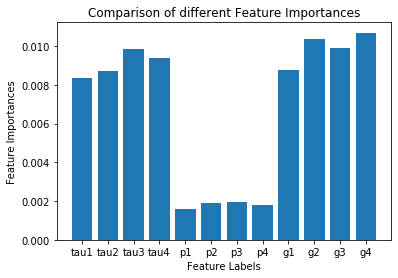

In [128]:
plt.bar(X.columns, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()